In [0]:
import pandas as pd #Pandas Import
df = pd.read_csv('https://query.data.world/s/gmqr4kpnfzeiyd7no3nrumydlfyzix') 
#Fetching data from Data.World website(download csv 
#file option is also available)

In [20]:
df.head()

,Table Names,Case_Type,Cases,Difference,Date,Country_Region,Province_State,Admin2,FIPS,Combined_Key,Lat,Long,Prep_Flow_Runtime,Latest_Date
0,JHU Daily,Deaths,0,0,2020-03-25,US,Virgin Islands,NaN,78000.0,"Virgin Islands, US",18.3358,-64.8963,3/26/2020 7:50:18 AM,3/25/2020
1,JHU Daily,Confirmed,17,0,2020-03-25,US,Virgin Islands,NaN,78000.0,"Virgin Islands, US",18.3358,-64.8963,3/26/2020 7:50:18 AM,3/25/2020
2,JHU Daily,Deaths,2,0,2020-03-25,US,Puerto Rico,NaN,NaN,"Puerto Rico, US",18.2208,-66.5901,3/26/2020 7:50:18 AM,3/25/2020
3,JHU Daily,Confirmed,51,0,2020-03-25,US,Puerto Rico,NaN,NaN,"Puerto Rico, US",18.2208,-66.5901,3/26/2020 7:50:18 AM,3/25/2020
4,JHU Daily,Deaths,1,0,2020-03-25,US,Guam,NaN,66000.0,"Guam, US",13.4443,144.7937,3/26/2020 7:50:18 AM,3/25/2020


In [21]:

df['Date']=pd.to_datetime(df.Date) #Converting date into pandas dataframe date format 
df.head()


,Table Names,Case_Type,Cases,Difference,Date,Country_Region,Province_State,Admin2,FIPS,Combined_Key,Lat,Long,Prep_Flow_Runtime,Latest_Date
0,JHU Daily,Deaths,0,0,2020-03-25,US,Virgin Islands,NaN,78000.0,"Virgin Islands, US",18.3358,-64.8963,3/26/2020 7:50:18 AM,3/25/2020
1,JHU Daily,Confirmed,17,0,2020-03-25,US,Virgin Islands,NaN,78000.0,"Virgin Islands, US",18.3358,-64.8963,3/26/2020 7:50:18 AM,3/25/2020
2,JHU Daily,Deaths,2,0,2020-03-25,US,Puerto Rico,NaN,NaN,"Puerto Rico, US",18.2208,-66.5901,3/26/2020 7:50:18 AM,3/25/2020
3,JHU Daily,Confirmed,51,0,2020-03-25,US,Puerto Rico,NaN,NaN,"Puerto Rico, US",18.2208,-66.5901,3/26/2020 7:50:18 AM,3/25/2020
4,JHU Daily,Deaths,1,0,2020-03-25,US,Guam,NaN,66000.0,"Guam, US",13.4443,144.7937,3/26/2020 7:50:18 AM,3/25/2020


In [8]:
df1=df[df['Country_Region']=='India'] #Retriving cases for India
df1.head()

,Table Names,Case_Type,Cases,Difference,Date,Country_Region,Province_State,Admin2,FIPS,Combined_Key,Lat,Long,Prep_Flow_Runtime,Latest_Date
27420,JHU Timeseries,Confirmed,0,0,2020-01-22,India,NaN,NaN,NaN,NaN,21.0,78.0,3/26/2020 7:50:18 AM,3/25/2020
27421,JHU Timeseries,Confirmed,0,0,2020-01-23,India,NaN,NaN,NaN,NaN,21.0,78.0,3/26/2020 7:50:18 AM,3/25/2020
27422,JHU Timeseries,Confirmed,0,0,2020-01-24,India,NaN,NaN,NaN,NaN,21.0,78.0,3/26/2020 7:50:18 AM,3/25/2020
27423,JHU Timeseries,Confirmed,0,0,2020-01-25,India,NaN,NaN,NaN,NaN,21.0,78.0,3/26/2020 7:50:18 AM,3/25/2020
27424,JHU Timeseries,Confirmed,0,0,2020-01-26,India,NaN,NaN,NaN,NaN,21.0,78.0,3/26/2020 7:50:18 AM,3/25/2020


In [9]:
df2=df1[df1['Case_Type']=='Confirmed'] #Filtering only confirmed cases
df2.head()

,Table Names,Case_Type,Cases,Difference,Date,Country_Region,Province_State,Admin2,FIPS,Combined_Key,Lat,Long,Prep_Flow_Runtime,Latest_Date
27420,JHU Timeseries,Confirmed,0,0,2020-01-22,India,NaN,NaN,NaN,NaN,21.0,78.0,3/26/2020 7:50:18 AM,3/25/2020
27421,JHU Timeseries,Confirmed,0,0,2020-01-23,India,NaN,NaN,NaN,NaN,21.0,78.0,3/26/2020 7:50:18 AM,3/25/2020
27422,JHU Timeseries,Confirmed,0,0,2020-01-24,India,NaN,NaN,NaN,NaN,21.0,78.0,3/26/2020 7:50:18 AM,3/25/2020
27423,JHU Timeseries,Confirmed,0,0,2020-01-25,India,NaN,NaN,NaN,NaN,21.0,78.0,3/26/2020 7:50:18 AM,3/25/2020
27424,JHU Timeseries,Confirmed,0,0,2020-01-26,India,NaN,NaN,NaN,NaN,21.0,78.0,3/26/2020 7:50:18 AM,3/25/2020


In [0]:
df2=df2.sort_values(by='Date') #Sort records by date 
df2['Date']=df2['Date'].astype('datetime64[ns]')

In [28]:
df3=df2.filter(['Date','Cases','Difference'],axis=1) #Filtering only required data
df3=df3.iloc[39:] #Taking data from 1st March onwards
df3.head()

,Date,Cases,Difference
27459,2020-03-01,3,0
27470,2020-03-02,5,0
27477,2020-03-03,5,0
27478,2020-03-04,28,0
27479,2020-03-05,30,0


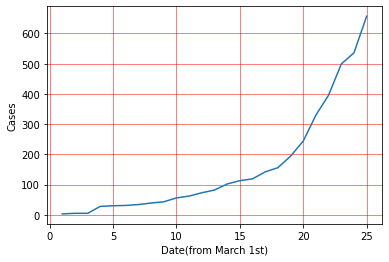

In [15]:
import matplotlib.pyplot as plt      
plt.plot(df3['Date'].dt.day,df3['Cases'])
plt.xlabel('Date(from March 1st)')
plt.ylabel('Cases')
plt.grid(which='major', linestyle='-', linewidth='0.5', color=' red')
#Plotting line plot using Matplotlib only:- Date vs Cases

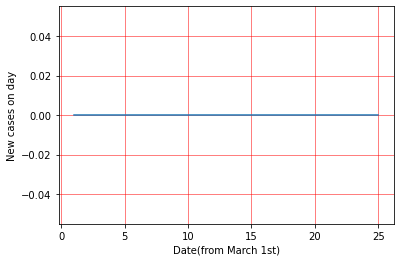

In [16]:
plt.plot(df3['Date'].dt.day,df3['Difference'])
plt.xlabel('Date(from March 1st)')
plt.ylabel('New cases on day')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
#Plotting daily found cases (diffrence)
#Source data not updated properly for this graph at this point of time

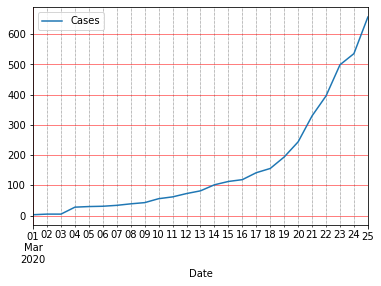

In [34]:
#Plotting Cases vs Date using pandas line plot
fig, ax = plt.subplots()
df3.plot(kind='line', x='Date', y='Cases', ax=ax) 

# Customize the major grid 
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

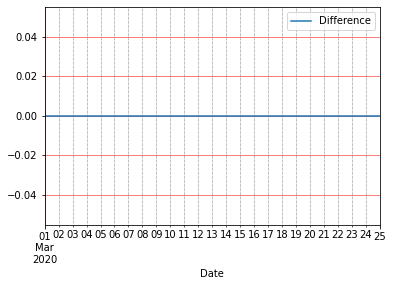

In [25]:
#Plotting Cases vs Diffrence(daily cases found) using pandas line plot

fig, ax = plt.subplots()
df3.plot(kind='line', x='Date', y='Difference', ax=ax)
ax.grid(axis='both',linestyle='-', linewidth='0.5', color='red')

# Customize the major grid#
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
from google.colab import files
plt.savefig("abc.png") #saving Graph in png form
files.download("abc.png") #Downloading Graph

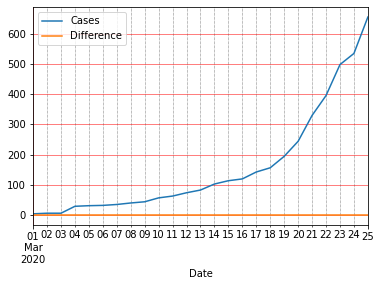

In [35]:
#Plotting both cases and diffrence in one gragh
fig, ax = plt.subplots()
df3.plot(kind='line', x='Date', y='Cases', ax=ax)
df3.plot(kind='line', x='Date', y='Difference', ax=ax)

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

In [29]:
# Creating Pivot table for converting case type rows to columns
#New columns like confirmed and Deaths are created with corrosponding values 
d1=df1.pivot_table('Cases',['Country_Region','Date'],'Case_Type')
d1.head()

Case_Type                  Confirmed  Deaths
Country_Region Date                         
India          2020-01-22          0       0
               2020-01-23          0       0
               2020-01-24          0       0
               2020-01-25          0       0
               2020-01-26          0       0

In [31]:
#Converting pivot table to dataframe fro plotting
d2=pd.DataFrame(d1.to_records())
d2=d2.iloc[39:]#filtering records from 1st March onwards
d2.head()

,Country_Region,Date,Confirmed,Deaths
39,India,2020-03-01,3,0
40,India,2020-03-02,5,0
41,India,2020-03-03,5,0
42,India,2020-03-04,28,0
43,India,2020-03-05,30,0


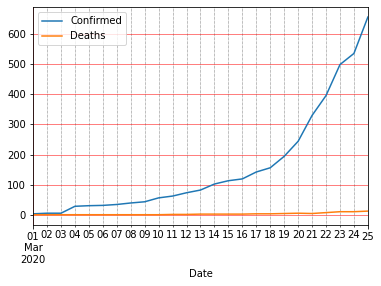

In [36]:
#Plotting cases and deaths on single graph using pandas line plot
fig, ax = plt.subplots()
d2.plot(kind='line', x='Date', y='Confirmed', ax=ax)
d2.plot(kind='line', x='Date', y='Deaths', ax=ax)

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')